In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def replacer_ctype(text):
  if text=='GENERAL' or text=='general' or text=='Gen':
    return 'GEN'
  elif text=='sc':
    return 'SC'
  elif text=='st':
    return 'ST'
  else:
    return text

def replacer_sex(text):
  if text=='MALE' or text=='male':
    return 'M'
  elif text=='FEMALE' or text=='female':
    return 'F'
  else:
    return text

In [4]:
#Preliminary Data Cleaning
df_root= pd.read_csv("All_States_GE.csv")
df= df_root[df_root['Year']==2019]
df2 = df.drop(['Assembly_No', 'Constituency_No', 'Year', 'month', 'Poll_No', 'DelimID', 'Sub_Region', 'N_Cand', 'ENOP', 'pid', 'Party_ID', 'last_poll', 'Contested', 'Last_Party',
               'Last_Party_ID', 'Last_Constituency_Name', 'Same_Constituency', 'Same_Party',
               'No_Terms', 'TCPD_Prof_Main_Desc', 'TCPD_Prof_Second', 'TCPD_Prof_Second_Desc',
               'Election_Type', 'Deposit_Lost'], axis=1)
nota_df = df2[(df2['Candidate'] == 'NOTA') | (df2['Candidate'] == 'None of the Above')]
df3 = df2[(df2['Candidate'] != 'NOTA') & (df2['Candidate'] != 'None of the Above')]
df3['Candidate_Type'].fillna('GEN', inplace=True)
df4= df3.copy(deep=True)
df4['ctype']= df3['Candidate_Type'].apply(lambda x: replacer_ctype(str(x)))
df4['sex']= df3['Sex'].apply(lambda x: replacer_sex(str(x)))
df5= df4.drop(['Sex', 'Candidate_Type'], axis=1)
df6= df5[df5['sex']!='nan']

C:\Users\deban\AppData\Local\Temp\ipykernel_7592\4121598205.py:2: DtypeWarning: Columns (17,36,37,38,39,40,41,42,43) have mixed types. Specify dtype option on import or set low_memory=False.
  df_root= pd.read_csv("All_States_GE.csv")
C:\Users\deban\AppData\Local\Temp\ipykernel_7592\4121598205.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['Candidate_Type'].fillna('GEN', inplace=True)


In [5]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8069 entries, 0 to 8612
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   State_Name             8069 non-null   object 
 1   Position               8069 non-null   int64  
 2   Candidate              8069 non-null   object 
 3   Party                  8069 non-null   object 
 4   Votes                  8069 non-null   float64
 5   Valid_Votes            8069 non-null   int64  
 6   Electors               8069 non-null   float64
 7   Constituency_Name      8069 non-null   object 
 8   Constituency_Type      8069 non-null   object 
 9   Turnout_Percentage     8069 non-null   float64
 10  Vote_Share_Percentage  8069 non-null   float64
 11  Margin                 8069 non-null   float64
 12  Margin_Percentage      8069 non-null   float64
 13  Party_Type_TCPD        8043 non-null   object 
 14  Turncoat               8069 non-null   object 
 15  Incu

In [6]:
df6.describe()

,Position,Votes,Valid_Votes,Electors,Turnout_Percentage,Vote_Share_Percentage,Margin,Margin_Percentage
count,8069.000000,8.069000e+03,8.069000e+03,8.069000e+03,8069.000000,8069.000000,8069.000000,8069.000000
mean,11.978312,7.555552e+04,1.132980e+06,1.707011e+06,67.060801,6.681124,39797.471682,3.508374
std,16.538964,1.793820e+05,2.009932e+05,2.952313e+05,9.915845,15.449179,106691.036646,9.194794
min,1.000000,8.400000e+01,4.700900e+04,5.518900e+04,8.940000,0.010000,0.000000,0.000000
25%,5.000000,1.251000e+03,1.029362e+06,1.553385e+06,60.330000,0.110000,55.000000,0.000000
50%,9.000000,2.962000e+03,1.126256e+06,1.703279e+06,66.760000,0.260000,333.000000,0.030000
75%,14.000000,1.116700e+04,1.245950e+06,1.856791e+06,74.390000,1.020000,2805.000000,0.250000
max,186.000000,1.068569e+06,1.763757e+06,3.150313e+06,90.660000,74.470000,712215.000000,52.730000


In [7]:
df6.dtypes

State_Name                object
Position                   int64
Candidate                 object
Party                     object
Votes                    float64
Valid_Votes                int64
Electors                 float64
Constituency_Name         object
Constituency_Type         object
Turnout_Percentage       float64
Vote_Share_Percentage    float64
Margin                   float64
Margin_Percentage        float64
Party_Type_TCPD           object
Turncoat                  object
Incumbent                 object
Recontest                 object
MyNeta_education          object
TCPD_Prof_Main            object
ctype                     object
sex                       object
dtype: object

In [8]:
#distribution of constituencies across the states
#

In [9]:
victory_list= df6[df6['Position']==1]
victory_list

,State_Name,Position,Candidate,Party,Votes,Valid_Votes,Electors,Constituency_Name,Constituency_Type,Turnout_Percentage,...,Margin,Margin_Percentage,Party_Type_TCPD,Turncoat,Incumbent,Recontest,MyNeta_education,TCPD_Prof_Main,ctype,sex
0,Andaman_&_Nicobar_Islands,1,KULDEEP RAI SHARMA,INC,95308.0,207296,318471.0,ANDAMAN & NICOBAR ISLANDS,GEN,65.09,...,1407.0,0.68,National Party,False,False,True,Graduate Professional,Business,GEN,M
16,Andhra_Pradesh,1,GODDETI. MADHAVI,YSRCP,562190.0,1074538,1451418.0,ARUKU,ST,74.03,...,224089.0,20.85,State-based Party,False,False,False,Graduate Professional,Social Work,ST,F
27,Andhra_Pradesh,1,KINJARAPU RAM MOHAN NAIDU,TDP,534544.0,1157329,1553860.0,SRIKAKULAM,GEN,74.48,...,6653.0,0.57,State-based Party,False,False,False,Post Graduate,Politics,GEN,M
37,Andhra_Pradesh,1,Bellana Chandra Sekhar,YSRCP,578418.0,1217890,1503980.0,VIZIANAGARAM,GEN,80.98,...,48036.0,3.94,State-based Party,False,False,False,Graduate Professional,Business,GEN,M
52,Andhra_Pradesh,1,M V V SATYANARAYANA,YSRCP,436906.0,1239754,1829300.0,VISAKHAPATNAM,GEN,67.77,...,4414.0,0.36,State-based Party,False,False,False,10th Pass,Business,GEN,M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8567,West_Bengal,1,BABUL SUPRIYO,BJP,633378.0,1238135,1615865.0,ASANSOL,GEN,76.62,...,197637.0,15.96,National Party,False,True,True,Graduate,Politics,GEN,M
8578,West_Bengal,1,ASIT KUMAR MAL,AITC,699171.0,1461269,1705073.0,BOLPUR,SC,85.70,...,106402.0,7.28,State-based Party (Other State),True,False,False,10th Pass,Politics,SC,M
8586,West_Bengal,1,SATABDI ROY,AITC,654077.0,1449423,1699219.0,BIRBHUM,GEN,85.30,...,88924.0,6.14,State-based Party (Other State),False,True,True,Graduate,Liberal Profession or Professional,GEN,F
8596,Bihar,1,Prince Raj,LJP,390276.0,788679,1679050.0,SAMASTIPUR,SC,46.97,...,102090.0,12.94,NaN,False,False,False,NaN,NaN,SC,M


**Insight 1**

There are some states where one party won an overwhelming majority (>45%) of the seats in the parliament, however these states had some parties which secured a substantially high vote share (>20%) which cut away the prominence of that party in the state. However there are other states where a one or two parties have secured (>45%) of the vote share and have without smaller parties cutting away at the significance of these parties. We will analyse the reasons why some parties are extremely strong in particular states

The list of strongholds excludes states and union territories which have less than or equal to 2 constituencies due to less statistical significance as a stronghold for a party.

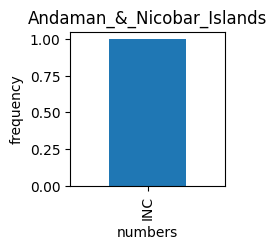

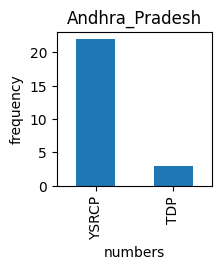

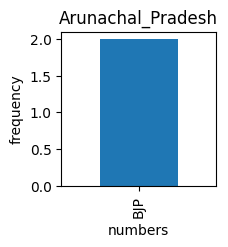

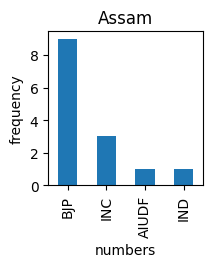

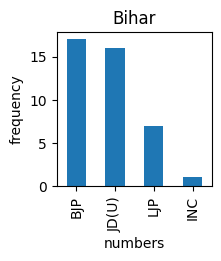

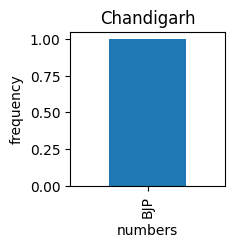

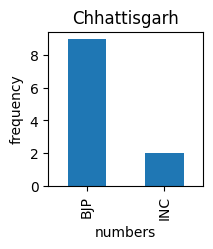

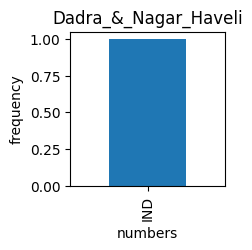

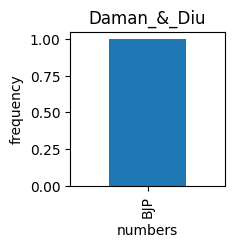

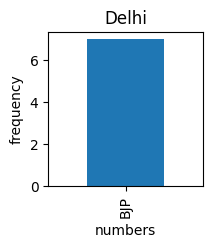

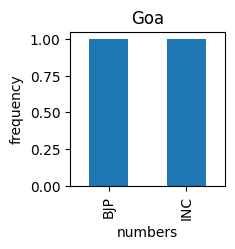

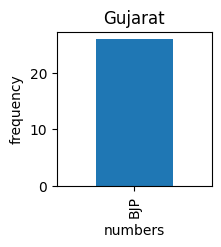

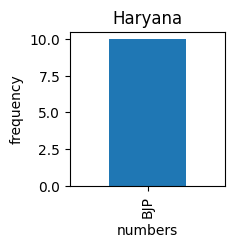

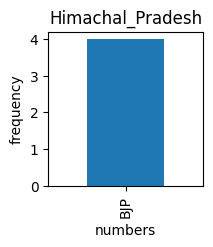

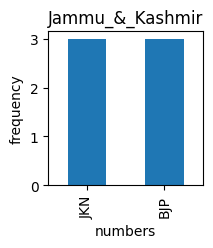

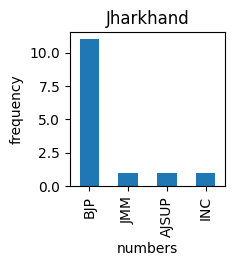

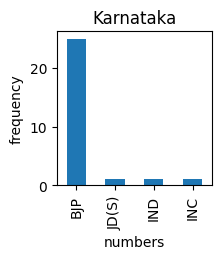

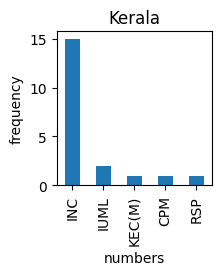

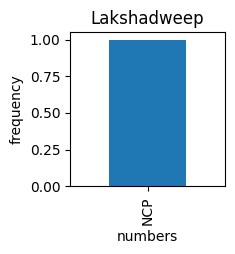

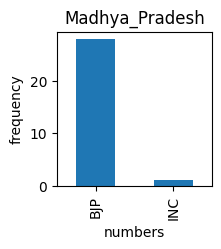

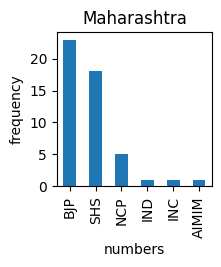

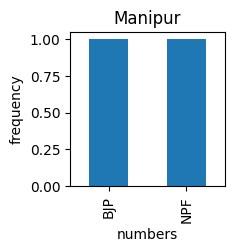

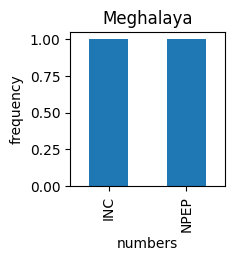

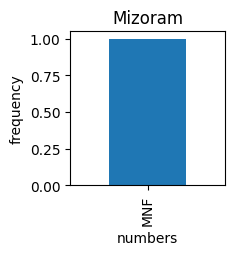

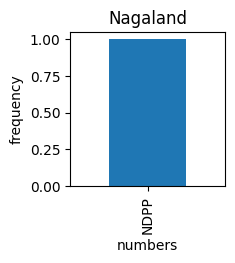

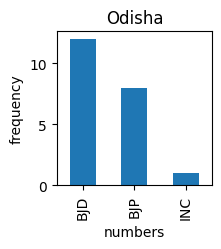

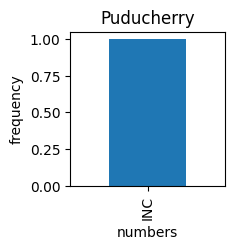

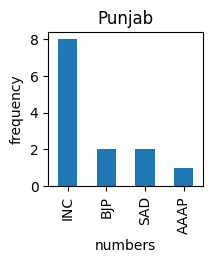

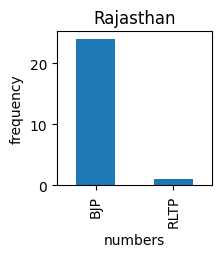

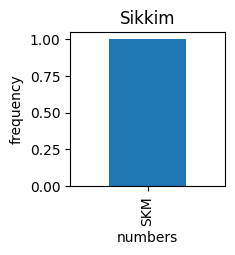

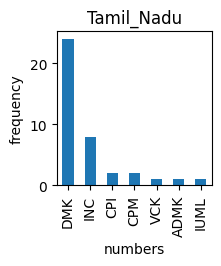

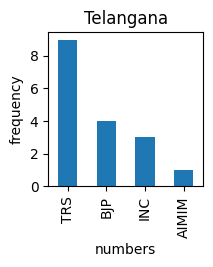

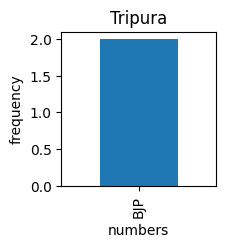

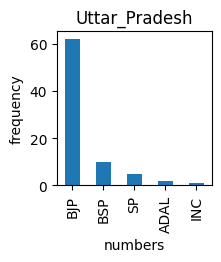

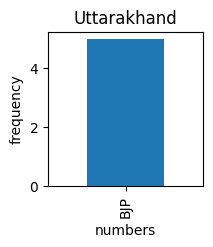

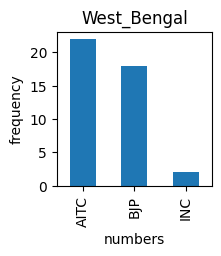

In [15]:
arr= victory_list['Party'].unique()
states= victory_list['State_Name'].unique()
stronghold_dict={}

for state in states:
  fig, ax = plt.subplots(figsize=(2,2))
  winlist= victory_list[victory_list['State_Name']==state]['Party']
  freq= winlist.value_counts()
  freq.plot(ax=ax, kind='bar', xlabel='numbers', ylabel='frequency', title=state)
  print("\n")
  plt.show()

In [16]:
for state in states:
  winlist= victory_list[victory_list['State_Name']==state]['Party']
  freq= winlist.value_counts()
  freq_arr= freq.to_dict()
  lenval= 0
  for item in freq_arr:
    lenval+= int(freq_arr[item])

  temparr=[]
  flag1=0
  flag2=0

  for item in freq_arr:
    percentage= freq_arr[item]/lenval
    if percentage>=0.45:
      flag1=1
      temparr.append(item)

    elif percentage>=0.15 and percentage<=0.45:
      flag2=1

  if flag1==1 and flag2==0 and lenval>2:
    stronghold_dict[state]=temparr

print(stronghold_dict)

{'Andhra_Pradesh': ['YSRCP'], 'Delhi': ['BJP'], 'Gujarat': ['BJP'], 'Haryana': ['BJP'], 'Himachal_Pradesh': ['BJP'], 'Jammu_&_Kashmir': ['JKN', 'BJP'], 'Jharkhand': ['BJP'], 'Karnataka': ['BJP'], 'Kerala': ['INC'], 'Madhya_Pradesh': ['BJP'], 'Rajasthan': ['BJP'], 'Uttar_Pradesh': ['BJP'], 'Uttarakhand': ['BJP']}


In [17]:
for item in stronghold_dict:
  subdf= victory_list[victory_list['State_Name']==item]
  party_list= stronghold_dict[item]
  print(item)
  for party in party_list:
    sub_sub_df= subdf[subdf['Party']==party]
    arr= sub_sub_df['Margin_Percentage'].tolist()
    arr2= sub_sub_df['Turncoat'].tolist()

    print(party)
    for item1, item2 in zip(arr, arr2):
        print((item1, item2))
  print("\n")

Andhra_Pradesh
YSRCP
(20.85, False)
(3.94, False)
(0.36, False)
(7.2, False)
(2.08, False)
(3.23, False)
(9.73, False)
(2.77, False)
(12.5, False)
(4.84, False)
(10.71, False)
(1.27, False)
(16.01, True)
(19.25, False)
(12.54, False)
(10.54, False)
(10.52, False)
(31.0, False)
(11.54, True)
(17.39, False)
(21.91, False)
(10.4, False)


Delhi
BJP
(23.27, False)
(25.05, False)
(31.1, False)
(27.86, False)
(39.48, False)
(40.13, False)
(30.23, False)


Gujarat
BJP
(29.86, False)
(33.42, False)
(17.21, False)
(26.02, False)
(22.08, False)
(43.38, False)
(38.91, False)
(32.25, False)
(25.74, False)
(30.82, False)
(24.19, False)
(23.42, False)
(14.95, False)
(22.16, False)
(31.65, False)
(17.83, False)
(33.42, False)
(39.55, False)
(12.0, False)
(48.2, False)
(30.67, False)
(29.07, False)
(15.98, False)
(51.31, False)
(52.73, False)
(28.07, False)


Haryana
BJP
(26.01, False)
(31.26, False)
(22.63, False)
(26.62, False)
(50.44, False)
(14.6, False)
(0.61, True)
(38.28, False)
(26.7, False)
(

**INSIGHT 2**  
There are very few constituencies (6) which are classified as General where candidates belonging SC/ST communities emerge victorious. Of these constituencies, 2 are in Arunachal Pradesh which is already 68.79% ST according to the 2011 census. There is no caste based data for the other 4 constituencies as a whole.   

This implies that SC and ST candidates have difficulty in winning constituencies which are dominated by non-reserved communities.

This inference is strengthened by the fact that among all the non-winning SC/ST candidates contesting in General seats, 89.50% of such candidates secured less 2% voteshare in their constituencies.

number of SC/ST candidates winning in general constituencies= 6



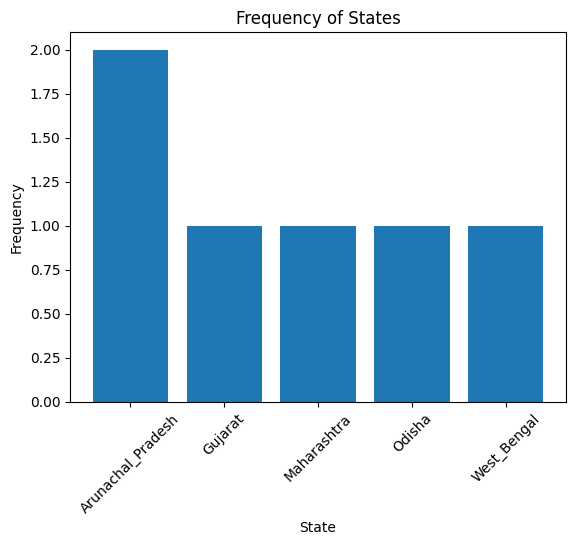

SC/ST candidates securing less than 2% votes in general constituencies= 89.50617283950618



C:\Users\deban\AppData\Local\Temp\ipykernel_7592\2492284012.py:18: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df5_info2= df5_info1[((df5_info1['Constituency_Type']=='GEN') & (df5['Position']!=1))]


In [18]:
# INSIGHT 1

df6_info1 = df6[df6['ctype'] != df6['Constituency_Type']]
arr= df6_info1[((df6_info1['Position']==1) & (df6_info1['Constituency_Type']=='GEN'))]
ls= arr['Margin_Percentage'].tolist()
ls.sort()
print("number of SC/ST candidates winning in general constituencies= "+str(len(ls))+"\n")

party_counts = arr['State_Name'].value_counts()
plt.bar(party_counts.index, party_counts.values)
plt.xlabel('State')
plt.ylabel('Frequency')
plt.title('Frequency of States')
plt.xticks(rotation=45)
plt.show()

df5_info1 = df5[df5['ctype'] != df5['Constituency_Type']]
df5_info2= df5_info1[((df5_info1['Constituency_Type']=='GEN') & (df5['Position']!=1))]
arr2= df5_info2['Vote_Share_Percentage'].tolist()
arr2.sort()

count=0
for item in arr2:
  if item<=2:
    count+=1

vote_val= count*100/len(arr2)
print("SC/ST candidates securing less than 2% votes in general constituencies= "+str(vote_val)+"\n")

**INSIGHT 3**

Before major elections, politicans change parties often. We will now analyse the success rates of the turncoats to other parties and compare how they perform as opposed to original non-turncoat members of the parties. There are 64 prties which fielded both non-turncoats and defectors to the party of which we will look at the success rates of the turncots in these parties. 

This analysis ignores the 5 parties which fielded only one non-defector because that would mean an insignificant comparison. Major parties such as BJP, INC and AAP witnessed a decrease in the average vote share and average margin of victory/loss also seeing a negligible or negative change in positions. 

In [77]:
def party_formatter(text):
  arr= text.split()
  if len(arr)==1:
      return text.lower()
  else:
    string= ""
    for word in arr:
      string+= word[0]
    return string.lower()

df6v1= df6.copy(deep=True)
df6v1['party']= df6['Party'].apply(lambda x: party_formatter(str(x)))
sub_df6= df6v1.drop(['Party'], axis=1)

In [79]:
turncoats= sub_df6[sub_df6['Turncoat']==True]
val_df= turncoats.groupby(['party']).mean()
val_df2= val_df.drop(['Margin', 'Votes','Valid_Votes','Electors','Turnout_Percentage'], axis=1)
col= turncoats.groupby(['party']).count()['Candidate']
val_df3= pd.concat([val_df2, col], axis=1)
val_df3

C:\Users\deban\AppData\Local\Temp\ipykernel_7592\241466918.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  val_df= turncoats.groupby(['party']).mean()


,Position,Vote_Share_Percentage,Margin_Percentage,Candidate
party,,,,
aaap,3.000000,2.510000,1.130000,1
adal,1.000000,49.330000,13.210000,2
admk,2.000000,40.155000,34.500000,2
aimim,3.000000,26.780000,24.990000,1
aitc,2.333333,34.475000,16.025000,6
...,...,...,...,...
vip,15.000000,0.090000,0.000000,1
vpi,10.500000,0.265000,0.010000,2
wpoi,12.000000,0.110000,0.000000,1


In [80]:
non_turncoats= sub_df6[sub_df6['Turncoat']==False]
nval_df= non_turncoats.groupby(['party']).mean()
nval_df2= nval_df.drop(['Margin', 'Votes','Valid_Votes','Electors','Turnout_Percentage'], axis=1)
ncol= non_turncoats.groupby(['party']).count()['Candidate']
nval_df3= pd.concat([nval_df2, ncol], axis=1)
nval_df3

C:\Users\deban\AppData\Local\Temp\ipykernel_7592\3839004066.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  nval_df= non_turncoats.groupby(['party']).mean()


,Position,Vote_Share_Percentage,Margin_Percentage,Candidate
party,,,,
aaap,4.852941,6.931471,4.153529,34
aabhap,9.250000,0.392500,0.062500,4
aacp,19.000000,0.080000,0.000000,1
aahpty,15.000000,0.320000,0.010000,1
aam,10.800000,0.678000,0.108000,5
...,...,...,...,...
ykp,7.800000,0.750000,0.226000,5
ysrcp,1.090909,48.879545,13.356818,22
ysrpp,19.000000,0.120000,0.010000,1


In [115]:
merged_df= pd.merge(val_df3, nval_df3, on='party', suffixes=('_yes', '_no'))
analysis_df1= merged_df[merged_df['Candidate_no']!=1].drop(['Candidate_yes', 'Candidate_no'], axis=1)
analysis_df1

,Position_yes,Vote_Share_Percentage_yes,Margin_Percentage_yes,Position_no,Vote_Share_Percentage_no,Margin_Percentage_no
party,,,,,,
aaap,3.000000,2.510000,1.130000,4.852941,6.931471,4.153529
admk,2.000000,40.155000,34.500000,1.950000,33.050000,26.148000
aimim,3.000000,26.780000,24.990000,1.000000,45.710000,16.255000
aitc,2.333333,34.475000,16.025000,2.910714,28.982500,13.820893
akbhad,12.500000,0.300000,0.015000,18.666667,0.193333,0.053333
apoi,9.000000,0.110000,0.020000,8.921053,0.435000,0.077237
bahump,11.000000,0.140000,0.000000,12.947368,0.196842,0.023158
baresp,8.000000,0.320000,0.030000,15.923077,0.178077,0.034231
bhaprap,16.000000,0.090000,0.000000,15.843137,0.160980,0.012941


In [125]:
analysis_df2= analysis_df1.copy(deep=True)
analysis_df2['vote_share_diff']=   analysis_df1['Vote_Share_Percentage_yes'] - analysis_df1['Vote_Share_Percentage_no']
analysis_df2['margin_diff']=   analysis_df1['Margin_Percentage_yes'] - analysis_df1['Margin_Percentage_no']
analysis_df2['position_diff']=   analysis_df1['Position_yes'] - analysis_df1['Position_no']

analysis_df= analysis_df2.drop(['Position_yes',	'Vote_Share_Percentage_yes',	'Margin_Percentage_yes',	'Position_no',	'Vote_Share_Percentage_no',	'Margin_Percentage_no'], axis=1)
analysis_df

,vote_share_diff,margin_diff,position_diff
party,,,
aaap,-4.421471,-3.023529,-1.852941
admk,7.105000,8.352000,0.050000
aimim,-18.930000,8.735000,2.000000
aitc,5.492500,2.204107,-0.577381
akbhad,0.106667,-0.038333,-6.166667
apoi,-0.325000,-0.057237,0.078947
bahump,-0.056842,-0.023158,-1.947368
baresp,0.141923,-0.004231,-7.923077
bhaprap,-0.070980,-0.012941,0.156863


In [132]:
result = {}

for column in analysis_df.columns:
    positive_count = (analysis_df[column] > 0).sum()
    negative_count = (analysis_df[column] <= 0).sum()
    result[column] = {'Positive': positive_count, 'Negative': negative_count}

result_df = pd.DataFrame(result)
result_df = result_df.T

print(result_df)


                 Positive  Negative
vote_share_diff        28        31
margin_diff            25        34
position_diff          25        34
